# Classification Prediction using Neural Networks 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
# read the csv
classification = pd.read_csv('/content/drive/MyDrive/Machine learning works/Research/demo.csv')

In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(classification.shape')
print (classification.loc[1])

format(classification.shape
tp_birth_place                    1.0
maternal_age                     40.0
tp_marital_status                 1.0
tp_maternal_education_years       3.0
num_live_births                   4.0
num_fetal_losses                  1.0
tp_pregnancy_duration             5.0
tp_pregnancy                      1.0
tp_labor                          2.0
tp_prenatal_appointments          4.0
cd_apgar1                         9.0
cd_apgar5                         9.0
newborn_weight                 3540.0
has_congenital_malformation       2.0
tp_maternal_skin_color            4.0
num_gestations                    5.0
num_normal_labors                 4.0
num_cesarean_labors               0.0
num_gestational_weeks            40.0
tp_presentation_newborn           2.0
tp_childbirth_assistance          1.0
tp_fill_form_responsible          5.0
cd_robson_group                   7.0
neonatal_death                    0.0
Name: 1, dtype: float64


In [ ]:
# print the last twenty or so data points
classification.loc[280:]

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
280,1.0,36.0,1.0,5.0,0.0,0.0,5.0,1.0,2.0,4.0,...,1.0,0.0,0.0,0.0,37.0,1.0,1.0,2.0,2.0,0.0
281,1.0,25.0,1.0,4.0,1.0,0.0,5.0,1.0,1.0,3.0,...,NaN,1.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN,0.0
282,3.0,20.0,1.0,NaN,0.0,0.0,5.0,1.0,1.0,3.0,...,NaN,1.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN,0.0
283,1.0,26.0,2.0,4.0,2.0,1.0,5.0,1.0,2.0,4.0,...,1.0,3.0,0.0,2.0,40.0,1.0,1.0,2.0,5.0,0.0
284,1.0,22.0,1.0,4.0,0.0,0.0,5.0,1.0,2.0,4.0,...,4.0,0.0,0.0,0.0,39.0,1.0,1.0,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,26.0,1.0,4.0,2.0,1.0,5.0,1.0,2.0,3.0,...,2.0,3.0,2.0,0.0,38.0,1.0,1.0,5.0,4.0,0.0
370,1.0,36.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,4.0,...,1.0,2.0,0.0,2.0,40.0,1.0,1.0,5.0,5.0,0.0
371,1.0,27.0,1.0,4.0,0.0,0.0,5.0,1.0,1.0,4.0,...,4.0,0.0,0.0,0.0,39.0,1.0,1.0,2.0,2.0,0.0
372,1.0,37.0,2.0,5.0,0.0,0.0,4.0,1.0,1.0,4.0,...,1.0,0.0,0.0,0.0,36.0,1.0,1.0,2.0,10.0,0.0


In [ ]:
# remove missing data (indicated with a "?")
data = classification[~classification.isin(['?'])]
data.loc[280:]

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
280,1.0,36.0,1.0,5.0,0.0,0.0,5.0,1.0,2.0,4.0,...,1.0,0.0,0.0,0.0,37.0,1.0,1.0,2.0,2.0,0.0
281,1.0,25.0,1.0,4.0,1.0,0.0,5.0,1.0,1.0,3.0,...,NaN,1.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN,0.0
282,3.0,20.0,1.0,NaN,0.0,0.0,5.0,1.0,1.0,3.0,...,NaN,1.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN,0.0
283,1.0,26.0,2.0,4.0,2.0,1.0,5.0,1.0,2.0,4.0,...,1.0,3.0,0.0,2.0,40.0,1.0,1.0,2.0,5.0,0.0
284,1.0,22.0,1.0,4.0,0.0,0.0,5.0,1.0,2.0,4.0,...,4.0,0.0,0.0,0.0,39.0,1.0,1.0,5.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,26.0,1.0,4.0,2.0,1.0,5.0,1.0,2.0,3.0,...,2.0,3.0,2.0,0.0,38.0,1.0,1.0,5.0,4.0,0.0
370,1.0,36.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,4.0,...,1.0,2.0,0.0,2.0,40.0,1.0,1.0,5.0,5.0,0.0
371,1.0,27.0,1.0,4.0,0.0,0.0,5.0,1.0,1.0,4.0,...,4.0,0.0,0.0,0.0,39.0,1.0,1.0,2.0,2.0,0.0
372,1.0,37.0,2.0,5.0,0.0,0.0,4.0,1.0,1.0,4.0,...,1.0,0.0,0.0,0.0,36.0,1.0,1.0,2.0,10.0,0.0


In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
280,1.0,36.0,1.0,5.0,0.0,0.0,5.0,1.0,2.0,4.0,...,1.0,0.0,0.0,0.0,37.0,1.0,1.0,2.0,2.0,0.0
283,1.0,26.0,2.0,4.0,2.0,1.0,5.0,1.0,2.0,4.0,...,1.0,3.0,0.0,2.0,40.0,1.0,1.0,2.0,5.0,0.0
284,1.0,22.0,1.0,4.0,0.0,0.0,5.0,1.0,2.0,4.0,...,4.0,0.0,0.0,0.0,39.0,1.0,1.0,5.0,2.0,0.0
285,1.0,25.0,2.0,4.0,1.0,1.0,6.0,1.0,1.0,2.0,...,1.0,2.0,1.0,0.0,42.0,1.0,1.0,2.0,4.0,0.0
286,3.0,31.0,1.0,4.0,3.0,0.0,5.0,1.0,1.0,4.0,...,4.0,3.0,3.0,0.0,40.0,1.0,1.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,26.0,1.0,4.0,2.0,1.0,5.0,1.0,2.0,3.0,...,2.0,3.0,2.0,0.0,38.0,1.0,1.0,5.0,4.0,0.0
370,1.0,36.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,4.0,...,1.0,2.0,0.0,2.0,40.0,1.0,1.0,5.0,5.0,0.0
371,1.0,27.0,1.0,4.0,0.0,0.0,5.0,1.0,1.0,4.0,...,4.0,0.0,0.0,0.0,39.0,1.0,1.0,2.0,2.0,0.0
372,1.0,37.0,2.0,5.0,0.0,0.0,4.0,1.0,1.0,4.0,...,1.0,0.0,0.0,0.0,36.0,1.0,1.0,2.0,10.0,0.0


In [ ]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(322, 24)
tp_birth_place                 float64
maternal_age                   float64
tp_marital_status              float64
tp_maternal_education_years    float64
num_live_births                float64
num_fetal_losses               float64
tp_pregnancy_duration          float64
tp_pregnancy                   float64
tp_labor                       float64
tp_prenatal_appointments       float64
cd_apgar1                      float64
cd_apgar5                      float64
newborn_weight                 float64
has_congenital_malformation    float64
tp_maternal_skin_color         float64
num_gestations                 float64
num_normal_labors              float64
num_cesarean_labors            float64
num_gestational_weeks          float64
tp_presentation_newborn        float64
tp_childbirth_assistance       float64
tp_fill_form_responsible       float64
cd_robson_group                float64
neonatal_death                 float64
dtype: object


In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

tp_birth_place                 float64
maternal_age                   float64
tp_marital_status              float64
tp_maternal_education_years    float64
num_live_births                float64
num_fetal_losses               float64
tp_pregnancy_duration          float64
tp_pregnancy                   float64
tp_labor                       float64
tp_prenatal_appointments       float64
cd_apgar1                      float64
cd_apgar5                      float64
newborn_weight                 float64
has_congenital_malformation    float64
tp_maternal_skin_color         float64
num_gestations                 float64
num_normal_labors              float64
num_cesarean_labors            float64
num_gestational_weeks          float64
tp_presentation_newborn        float64
tp_childbirth_assistance       float64
tp_fill_form_responsible       float64
cd_robson_group                float64
neonatal_death                 float64
dtype: object

In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
count,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,1.027950,28.47205,2.000000,4.201863,1.018634,0.270186,4.894410,1.031056,1.565217,3.745342,...,2.270186,1.26087,0.649068,0.360248,38.360248,1.071429,1.177019,3.928571,4.024845,0.015528
std,0.214349,6.36292,1.275213,0.636087,1.348691,0.604999,0.481463,0.173739,0.496500,0.577669,...,1.424632,1.51430,1.191016,0.702047,2.378651,0.257940,0.382279,1.439710,2.499720,0.123832
min,1.000000,15.00000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.00000,0.000000,0.000000,22.000000,1.000000,1.000000,2.000000,1.000000,0.000000
25%,1.000000,24.00000,1.000000,4.000000,0.000000,0.000000,5.000000,1.000000,1.000000,4.000000,...,1.000000,0.00000,0.000000,0.000000,38.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,1.000000,29.00000,2.000000,4.000000,1.000000,0.000000,5.000000,1.000000,2.000000,4.000000,...,1.000000,1.00000,0.000000,0.000000,39.000000,1.000000,1.000000,5.000000,4.000000,0.000000
75%,1.000000,33.00000,2.000000,5.000000,1.000000,0.000000,5.000000,1.000000,2.000000,4.000000,...,4.000000,2.00000,1.000000,1.000000,40.000000,1.000000,1.000000,5.000000,5.000000,0.000000
max,3.000000,45.00000,5.000000,5.000000,10.000000,3.000000,6.000000,2.000000,2.000000,4.000000,...,5.000000,11.00000,8.000000,5.000000,44.000000,2.000000,2.000000,5.000000,11.000000,1.000000


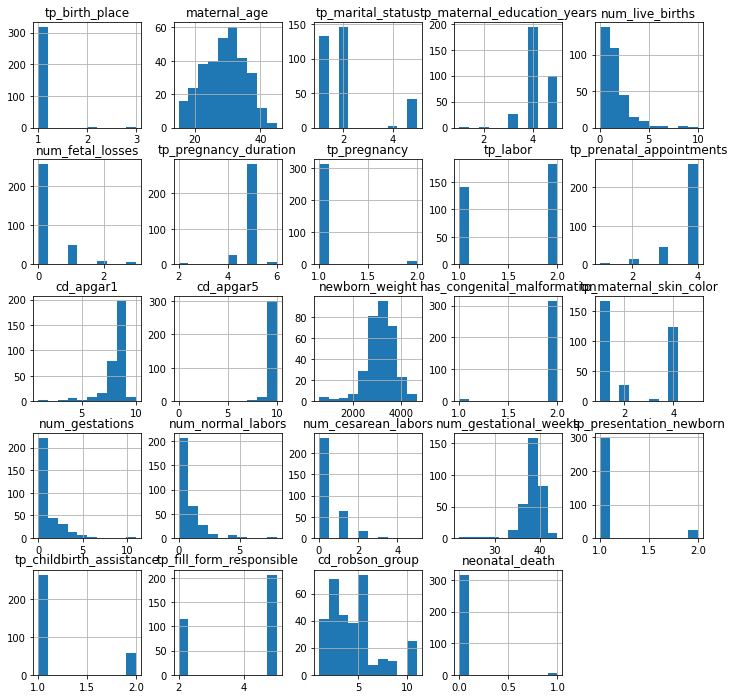

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

### 2. Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 

Consequently, we will need to convert our class data to categorical labels. For example, the label 2 will become [0, 0, 1, 0, 0]. 

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['neonatal_death'], 1))
y = np.array(data['neonatal_death'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(257, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### 3. Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 192       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 238
Trainable params: 238
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9805
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9805
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9805
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9805
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9805
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9805
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9805
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9805
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 11/

### 4. Improving Results - A Binary Classification Problem


In [ ]:
# convert into binary classification problem 
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=23, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 192       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
26/26 [==============================] - 1s 1ms/step - loss: 0.5148 - accuracy: 0.7860 
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9805
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9805
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9805
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9805
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9805
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9805
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9805
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 11

### 5. Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility. 

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.9846153846153847
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        65
         1.0       0.00      0.00      0.00         0

    accuracy                           0.98        65
   macro avg       0.50      0.49      0.50        65
weighted avg       1.00      0.98      0.99        65



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

